# Importing necessary packages and reading the dataset

In [50]:
#importing the neccesary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [51]:
#load the dataset

data=pd.read_csv("loan_prediction.csv")

In [52]:
#first 5 rows of the data

data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Univariate analysis

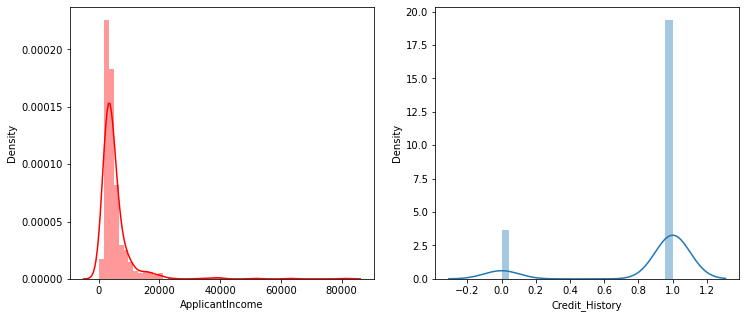

In [53]:
#plotting the distribution of feature using displot
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data['ApplicantIncome'], color = 'r')
plt.subplot(122)
sns.distplot(data['Credit_History'])
plt.show()

# Bivariate analysis

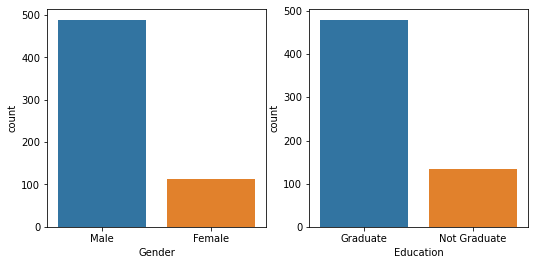

In [54]:
#plotting the count plot
plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
sns.countplot(data['Gender'])
plt.subplot(1,4,2)
sns.countplot(data['Education'])
plt.show()

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

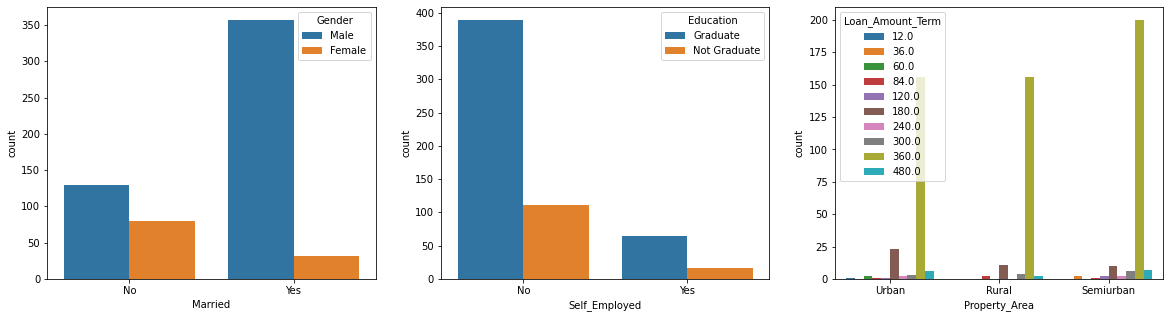

In [55]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(data['Married'], hue=data['Gender'])
plt.subplot(132)
sns.countplot(data['Self_Employed'], hue=data['Education'])
plt.subplot(133)
sns.countplot(data['Property_Area'], hue=data['Loan_Amount_Term'])

# Multivariate analysis

<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

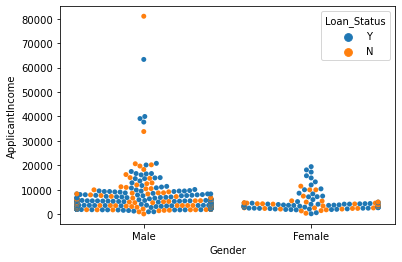

In [56]:
sns.swarmplot(data['Gender'], data['ApplicantIncome'], hue= data['Loan_Status'])

# Descriptive analysis

In [57]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Other visualizers

<AxesSubplot:>

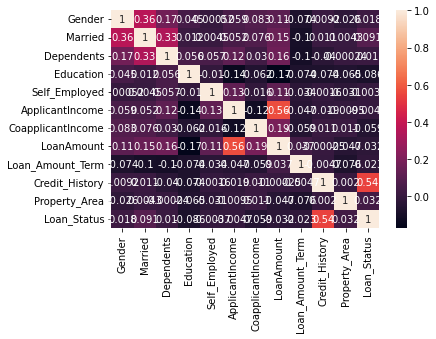

In [72]:
#heatmap
sns.heatmap(data.corr(),annot=True)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Loan_Status'>

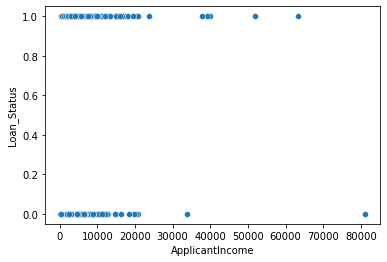

In [76]:
sns.scatterplot(data['ApplicantIncome'],data['Loan_Status'])

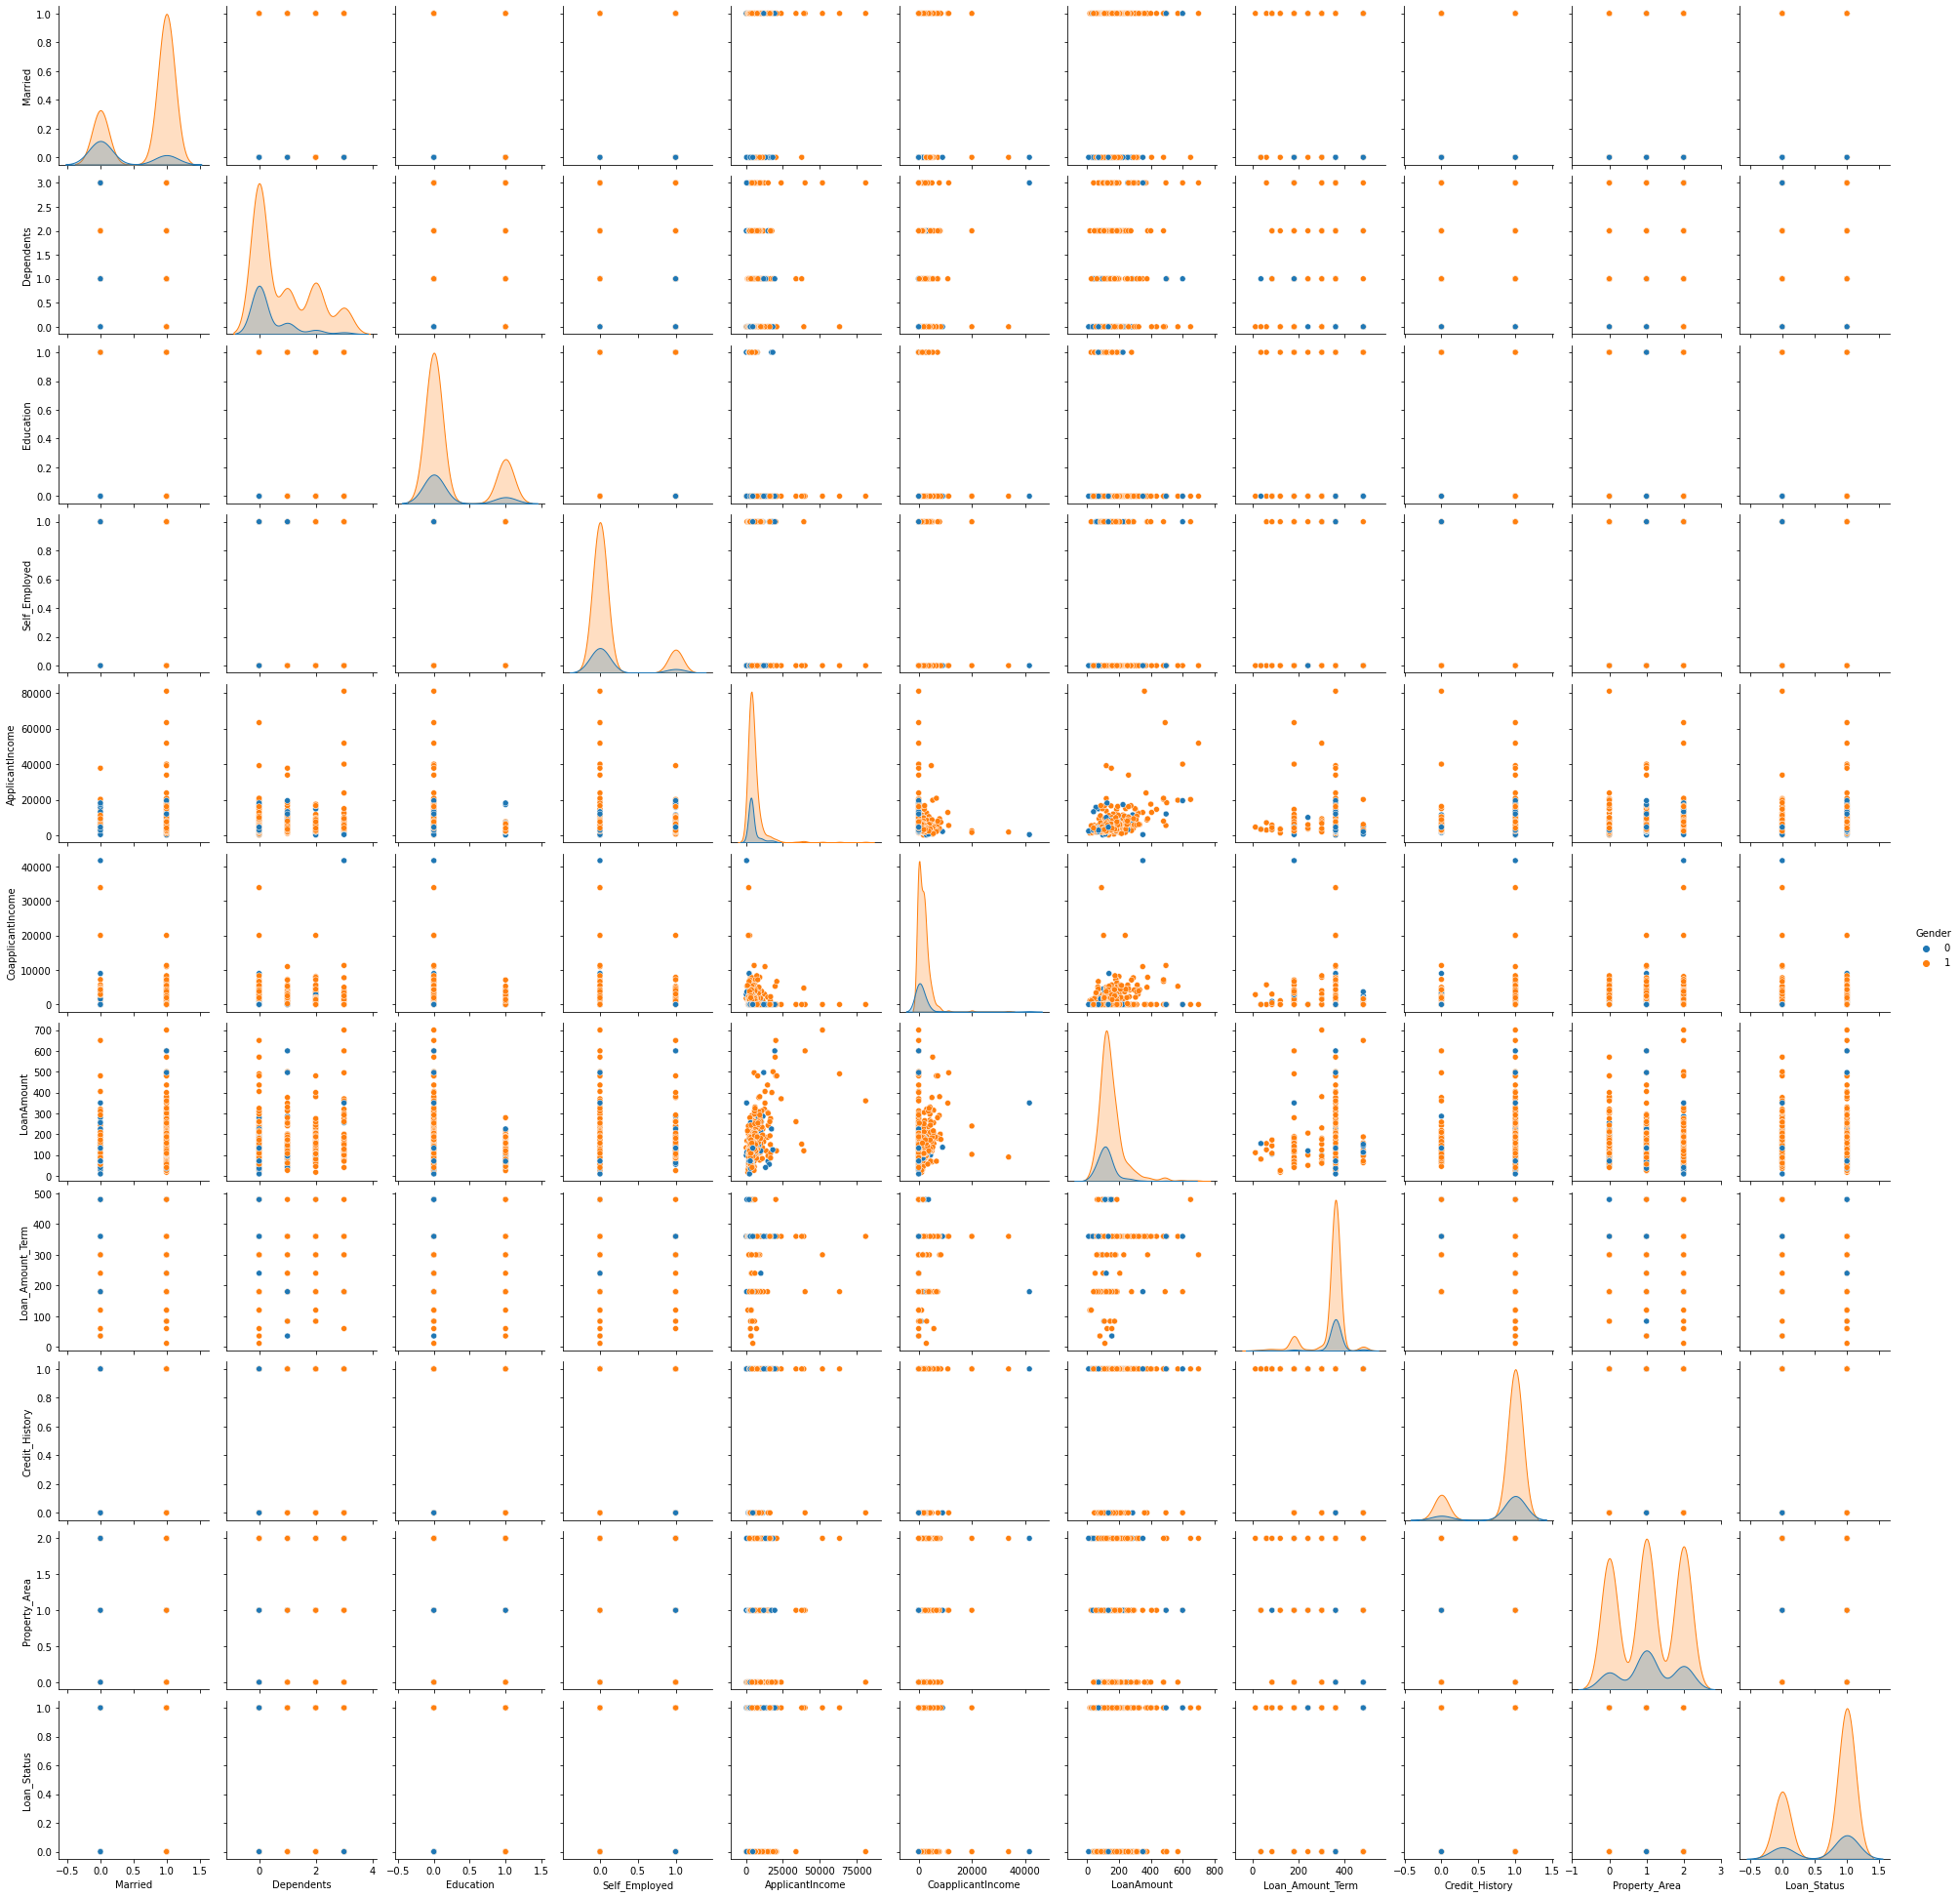

In [75]:
#pairplot
sns.pairplot(data,hue="Gender")

<AxesSubplot:>

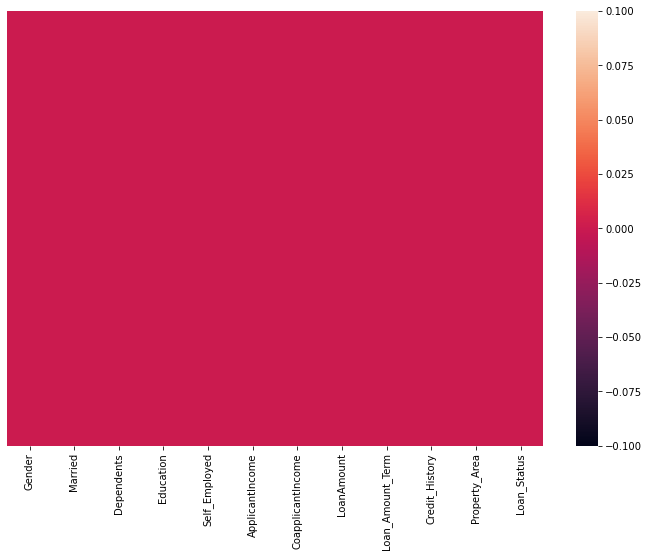

In [77]:
#heatmap
fig=plt.figure(figsize=(12,8))
sns.heatmap(data.isna(),yticklabels=False)

# Checking for null values

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [59]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [60]:
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mode()[0])
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mode()[0])
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Dependents']=data['Dependents'].str.replace('+','')
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [61]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Handling categorical values

In [62]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data=data.drop(columns=["Loan_ID"],axis=1)

In [63]:
data.Gender=le.fit_transform(data.Gender)
data.Married=le.fit_transform(data.Married)
data.Education=le.fit_transform(data.Education)
data.Self_Employed=le.fit_transform(data.Self_Employed)
data.Property_Area=le.fit_transform(data.Property_Area)
data.Loan_Status=le.fit_transform(data.Loan_Status)
data.Dependents=le.fit_transform(data.Dependents)

In [64]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


# Splitting into dependent and independent data

In [65]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [66]:
x=data.iloc[:,:-1]
y=data.Loan_Status
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2


In [67]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

# Balancing the dataset

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

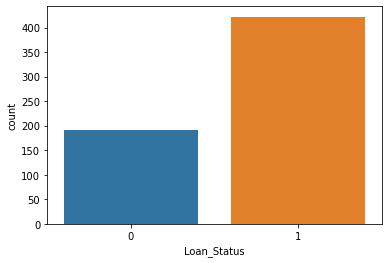

In [68]:
from imblearn.under_sampling import RandomUnderSampler
sns.countplot(data.Loan_Status)

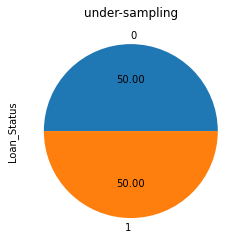

In [69]:
rus=RandomUnderSampler(sampling_strategy=1)
x_res,y_res=rus.fit_resample(x,y)
ax=y_res.value_counts().plot.pie(autopct='%.2f')
_=ax.set_title("under-sampling")

In [70]:
from imblearn.combine import SMOTETomek
smote = SMOTETomek(0.90)
y = data['Loan_Status']
x = data.drop(columns=['Loan_Status'],axis = 1)
x_bal,y_bal = smote.fit_resample(x,y)
print(y.value_counts())
print(y_bal.value_counts())

1    422
0    192
Name: Loan_Status, dtype: int64
1    348
0    305
Name: Loan_Status, dtype: int64


# Scaling the Data

In [71]:
x_scale=pd.DataFrame(scale(x),columns=x.columns)
x_scale.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,-0.302759,0.273231,0.411733,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.207648,0.273231,0.411733,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.944757,0.273231,0.411733,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.302759,0.273231,0.411733,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.053093,0.273231,0.411733,1.223298


# Splitting the data into train and test 


In [78]:
from sklearn.model_selection import train_test_split

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [80]:
print(x_train.shape,y_train.shape)

(491, 11) (491,)


In [81]:
print(x_test.shape,y_test.shape)

(123, 11) (123,)


# Decision Tree model

In [118]:
from sklearn.tree import DecisionTreeClassifier

In [119]:
#intializing the DT

model=DecisionTreeClassifier()

In [120]:
#traning the model on train data

model.fit(x_train,y_train)

DecisionTreeClassifier()

In [121]:
#prediction on test data

pred1=model.predict(x_test)

pred1

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [122]:
from sklearn import metrics

In [123]:
metrics.confusion_matrix(y_test,pred2)

array([[22, 21],
       [17, 63]], dtype=int64)

In [124]:
print('DT model ACcuracy Score:',metrics.accuracy_score(y_test,pred2))

DT model ACcuracy Score: 0.6910569105691057


In [125]:
acc=metrics.accuracy_score(y_test,pred2)
acc

0.6910569105691057

In [126]:
# Error

1-acc

0.3089430894308943

In [127]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [128]:
#.predcition on unknow data

future=model.predict([[0,0,0,2,1,5829,0,146.32,360,1,2]])

print('My model is predicted:',future)

My model is predicted: [1]


# Random forest Classifier

In [129]:
from sklearn.ensemble import RandomForestClassifier

In [130]:
rf =RandomForestClassifier()

In [131]:
#taining model on train data

rf.fit(x_train,y_train)

RandomForestClassifier()

In [132]:
#predcition on test data

pred2=rf.predict(x_test)

pred2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1])

In [133]:
print('RF model ACcuracy Score:',metrics.accuracy_score(y_test,pred))

RF model ACcuracy Score: 0.7560975609756098


In [134]:
rf_acc=metrics.accuracy_score(y_test,pred)

In [135]:
#error

1-rf_acc

0.24390243902439024

In [136]:
#confusion matrix for RF
metrics.confusion_matrix(y_test,pred)

array([[19, 24],
       [ 6, 74]], dtype=int64)

In [137]:
#confusion matrix for DT

metrics.confusion_matrix(y_test,pred2)

array([[18, 25],
       [ 4, 76]], dtype=int64)

In [138]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.44      0.56        43
           1       0.76      0.93      0.83        80

    accuracy                           0.76       123
   macro avg       0.76      0.68      0.70       123
weighted avg       0.76      0.76      0.74       123



# KNN Model

In [139]:
knn=KNeighborsClassifier()

In [140]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [141]:
pred3 = knn.predict(x_test)

pred3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1])

In [142]:
print(confusion_matrix(y_test,pred))

[[19 24]
 [ 6 74]]


In [143]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.44      0.56        43
           1       0.76      0.93      0.83        80

    accuracy                           0.76       123
   macro avg       0.76      0.68      0.70       123
weighted avg       0.76      0.76      0.74       123



# XGBoost Model

In [144]:
xg = GradientBoostingClassifier()

In [145]:
xg.fit(x_train,y_train)

GradientBoostingClassifier()

In [146]:
pred4 = xg.predict(x_test)

pred4

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [147]:
print(confusion_matrix(y_test,pred))

[[19 24]
 [ 6 74]]


In [148]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.44      0.56        43
           1       0.76      0.93      0.83        80

    accuracy                           0.76       123
   macro avg       0.76      0.68      0.70       123
weighted avg       0.76      0.76      0.74       123



# Comparing the model

In [150]:
print("Decision Tree Model Testing Accuracy")
print(accuracy_score(y_test,pred1))

Decision Tree Model Testing Accuracy
0.6910569105691057


<AxesSubplot:>

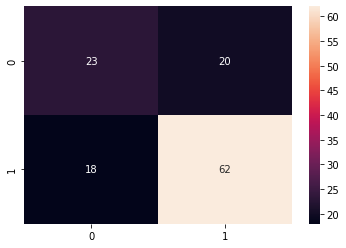

In [151]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, pred1)
import seaborn as sns
sns.heatmap(cf, annot=True)

In [152]:
print("Random Forest Model Testing Accuracy")
print(accuracy_score(y_test,pred2))

Random Forest Model Testing Accuracy
0.7642276422764228


<AxesSubplot:>

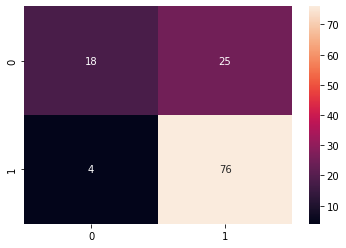

In [153]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, pred2)
sns.heatmap(cf, annot=True)

In [155]:
print("KNN Model Testing Accuracy")
print(accuracy_score(y_test,pred3))

KNN Model Testing Accuracy
0.5772357723577236


<AxesSubplot:>

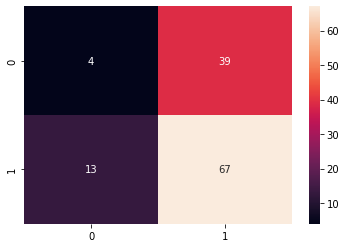

In [156]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, pred3)
sns.heatmap(cf, annot=True)

In [157]:
print("Xgboost Model Testing Accuracy")
print(accuracy_score(y_test,pred4))

Xgboost Model Testing Accuracy
0.7560975609756098


<AxesSubplot:>

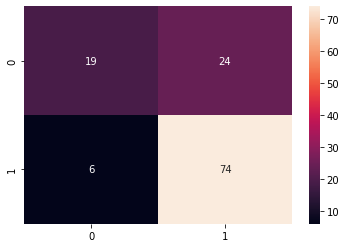

In [158]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, pred4)
sns.heatmap(cf, annot=True)

# Saving the model

In [160]:
pickle.dump(xg,open('Xmodel.pkl','wb'))

In [161]:
pickle.dump(x_scale,open('scale.pkl','wb'))

In [163]:
import joblib
joblib.dump(xg,r"C:\Users\LENOVO\Documents\ML\XG.joblib")

['C:\\Users\\LENOVO\\Documents\\ML\\XG.joblib']